**Analysis of Crime Against Women** :

- Right from the time of her birth, or even before, a girl could become victim or target of a crime. Let us analyze the dataset from <https://query.data.world/s/gwzqo3gfrigftsasus6niivgjf7fh7> and discuss the outcomes briefly using the tools and methodologies of Data Analysis.


- In this project we will discuss about the total **reported** and **unreported rape cases** that has taken place in various states of India. We will also find out the most vulnerable age group that is more prone to such heinous crime.


- In the end we will discuss the steps and **measures** that can be implemented in order to protect the dignity and self respect of a woman.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
sns.set_theme(style="dark")
df = pd.read_csv('https://query.data.world/s/gwzqo3gfrigftsasus6niivgjf7fh7')
df.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [ ]:
df.columns = ['Location', 
              'Year',
              'Category',
              'Cases Reported',
              'Victims (>50)',
              'Victims (10-14)',
              'Victims (14-18)',
              'Victims (18-30)',
              'Victims (30-50)',
              'Total Rape Victims',
              'Victims (upto 10)']
df

,Location,Year,Category,Cases Reported,Victims (>50),Victims (10-14),Victims (14-18),Victims (18-30),Victims (30-50),Total Rape Victims,Victims (upto 10)
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [ ]:
df.describe()

,Year,Cases Reported,Victims (>50),Victims (10-14),Victims (14-18),Victims (18-30),Victims (30-50),Total Rape Victims,Victims (upto 10)
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,1.866667,23.657143,53.085714,212.937143,60.236190,362.198095,10.415238
std,2.87365,592.180572,4.640286,50.677418,115.127899,350.135760,118.322713,592.418089,19.533134
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2005.50000,37.000000,0.000000,3.000000,5.000000,15.500000,4.000000,37.000000,2.000000
75%,2008.00000,527.500000,1.000000,19.000000,42.000000,308.000000,58.750000,531.500000,11.000000
max,2010.00000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


In [ ]:
#Printing data when certain rape cases are not reported
df[df['Total Rape Victims'] != df['Cases Reported']].head()

,Location,Year,Category,Cases Reported,Victims (>50),Victims (10-14),Victims (14-18),Victims (18-30),Victims (30-50),Total Rape Victims,Victims (upto 10)
150,Chandigarh,2001,Total Rape Victims,18,0,8,4,4,3,19,0
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
270,Delhi,2001,Total Rape Victims,381,0,81,154,59,41,383,48
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
273,Delhi,2002,Total Rape Victims,403,0,54,52,217,49,407,35


In [ ]:
df['Cases Unreported'] = df['Total Rape Victims'] - df['Cases Reported']
df[df['Cases Unreported'] > 0].head()

,Location,Year,Category,Cases Reported,Victims (>50),Victims (10-14),Victims (14-18),Victims (18-30),Victims (30-50),Total Rape Victims,Victims (upto 10),Cases Unreported
150,Chandigarh,2001,Total Rape Victims,18,0,8,4,4,3,19,0,1
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0,1
270,Delhi,2001,Total Rape Victims,381,0,81,154,59,41,383,48,2
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45,2
273,Delhi,2002,Total Rape Victims,403,0,54,52,217,49,407,35,4


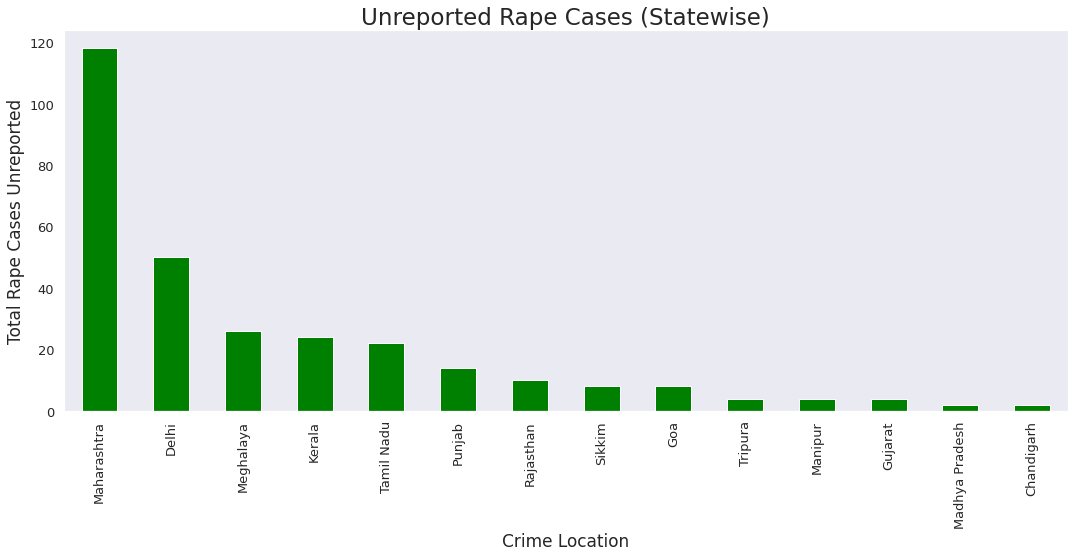

In [ ]:
unreported_victims_by_state = df.groupby('Location').sum()
unreported_victims_by_state.drop('Year', axis = 1, inplace = True)
plt.subplots(figsize = (18, 7))
ct = unreported_victims_by_state[unreported_victims_by_state['Cases Unreported']>0]['Cases Unreported'].sort_values(ascending = False)
ax = ct.plot.bar(color='green')
ax.set_xlabel('Crime Location',fontsize=17)
ax.set_ylabel('Total Rape Cases Unreported',fontsize=17)
ax.set_title('Unreported Rape Cases (Statewise)',fontsize=23)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [ ]:
rape_victims_by_state = df.groupby('Location').sum()
rape_victims_by_state.drop('Year', axis = 1, inplace = True)
print('Total Rape Victims = ' ,rape_victims_by_state['Cases Reported'].sum())
rape_victims_by_state.sort_values(by = 'Cases Reported', ascending = False).head()

Total Rape Victims =  380016


,Cases Reported,Victims (>50),Victims (10-14),Victims (14-18),Victims (18-30),Victims (30-50),Total Rape Victims,Victims (upto 10),Cases Unreported
Location,,,,,,,,,
Madhya Pradesh,58512,362,4998,11108,29064,11566,58514,1416,2
West Bengal,32756,20,312,546,25172,6580,32756,126,0
Uttar Pradesh,30106,24,2848,6184,16152,4172,30106,726,0
Maharashtra,28892,126,2610,8304,13120,2970,29010,1880,118
Assam,25524,190,306,818,17014,7104,25524,92,0


In [ ]:
rape_victims_by_state.describe()

,Cases Reported,Victims (>50),Victims (10-14),Victims (14-18),Victims (18-30),Victims (30-50),Total Rape Victims,Victims (upto 10),Cases Unreported
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,10857.600000,56.000000,709.714286,1592.571429,6388.114286,1807.085714,10865.942857,312.457143,8.342857
std,13164.879882,85.111691,1107.928554,2510.805569,7617.671173,2577.345070,13168.912014,428.582365,21.841599
min,14.000000,0.000000,0.000000,0.000000,6.000000,2.000000,14.000000,0.000000,-4.000000
25%,537.000000,0.000000,86.000000,96.000000,258.000000,45.000000,543.000000,41.000000,0.000000
50%,6674.000000,20.000000,262.000000,656.000000,4070.000000,650.000000,6678.000000,116.000000,0.000000
75%,18611.000000,65.000000,619.000000,1629.000000,11269.000000,2972.000000,18611.000000,402.000000,6.000000
max,58512.000000,362.000000,4998.000000,11108.000000,29064.000000,11566.000000,58514.000000,1880.000000,118.000000


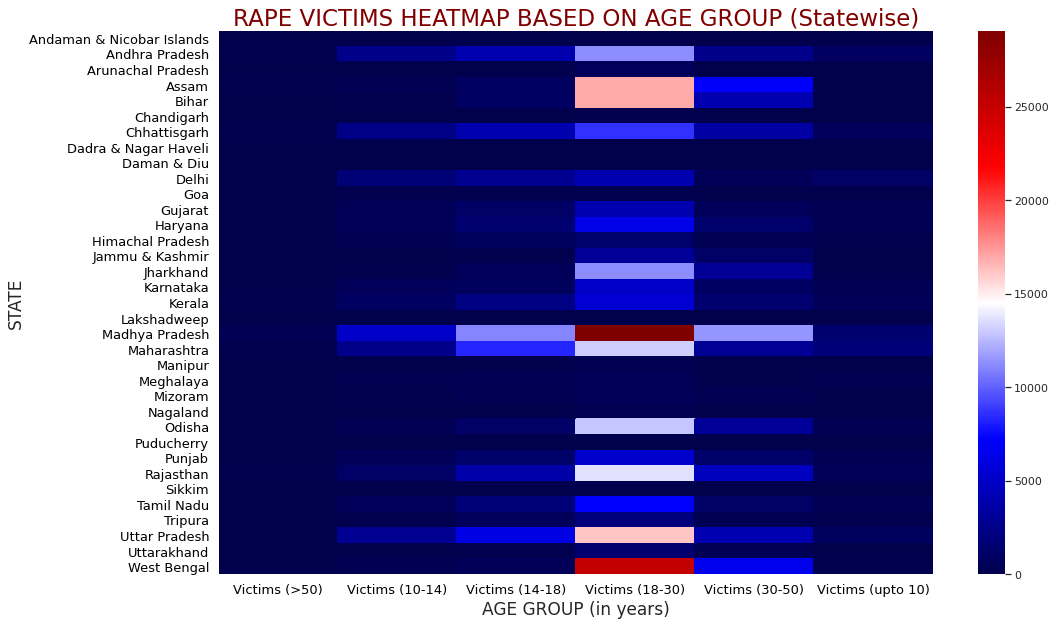

In [ ]:
# let's make a heatmap variable
rape_victims_heatmap = rape_victims_by_state.drop(['Cases Reported', 
                                                   'Total Rape Victims', 
                                                   'Cases Unreported'], axis = 1)
plt.subplots(figsize = (16, 10))
ax = sns.heatmap(rape_victims_heatmap, cmap="seismic")
ax.set_xlabel('AGE GROUP (in years)',fontsize=17)
ax.set_ylabel('STATE',fontsize=17)
ax.set_title('RAPE VICTIMS HEATMAP BASED ON AGE GROUP (Statewise)',fontsize=23,color='maroon')
plt.xticks(fontsize=13,color='black',rotation=0)
plt.yticks(fontsize=13,color='black')
plt.show()

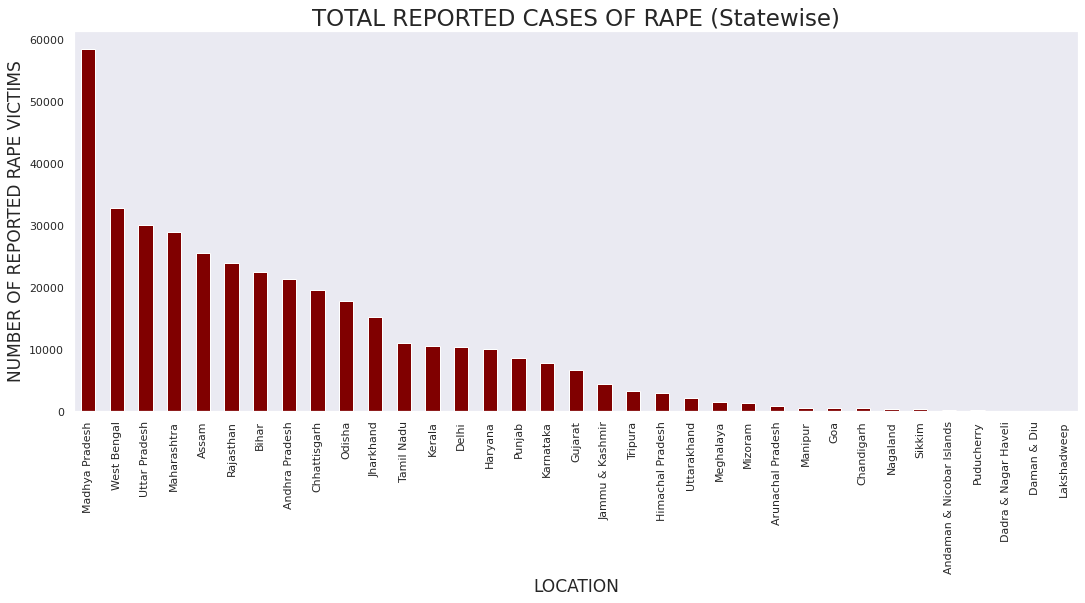

In [ ]:
# let's first plot only the total number of rape cases reported in each state
plt.subplots(figsize = (18, 7))
ct = rape_victims_by_state['Cases Reported'].sort_values(ascending = False)
#print(ct)
ax = ct.plot.bar(color='maroon')
#ax = sns.barplot(x = rape_victims_by_state.index, y = rape_victims_by_state['Rape_Cases_Reported'])
ax.set_xlabel('LOCATION',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('TOTAL REPORTED CASES OF RAPE (Statewise)',fontsize=23)
plt.show()

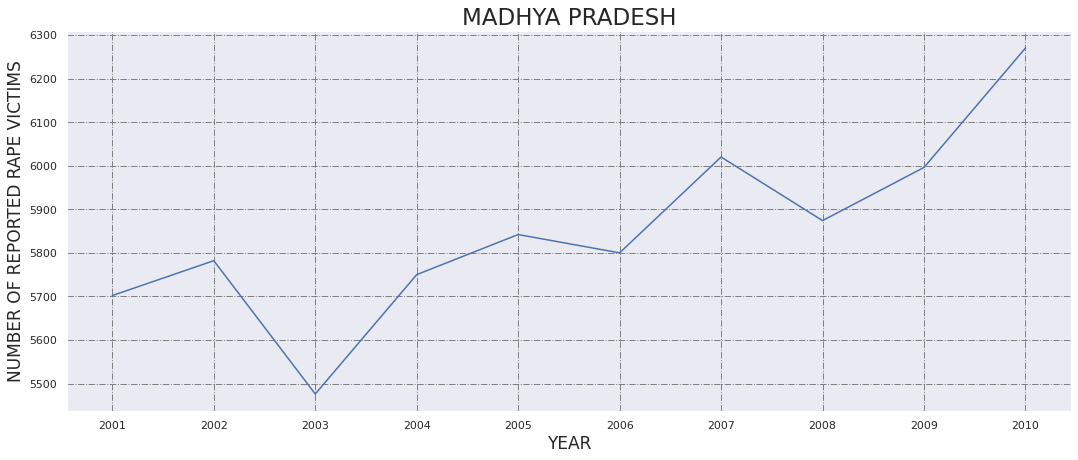

In [ ]:
mp_rape_victims = df[df['Location'] == 'Madhya Pradesh']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('MADHYA PRADESH',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

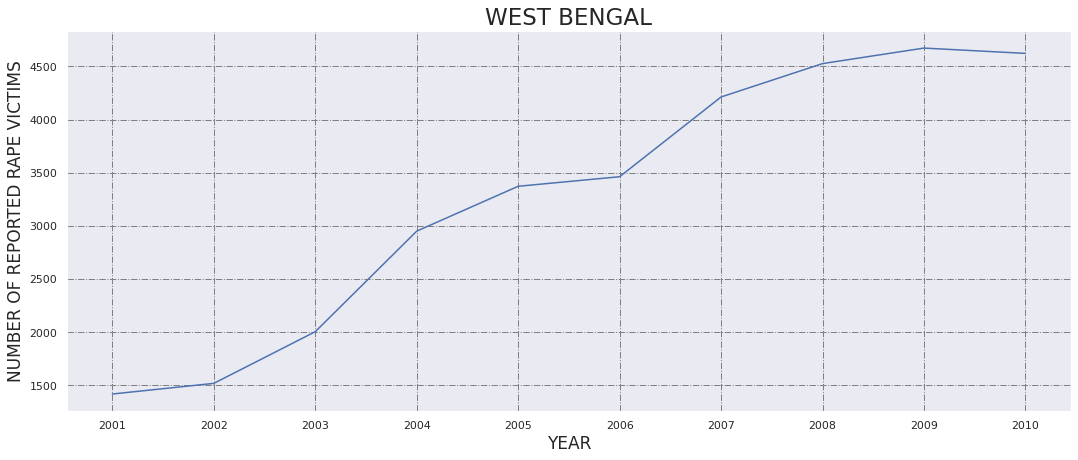

In [ ]:
mp_rape_victims = df[df['Location'] == 'West Bengal']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('WEST BENGAL',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

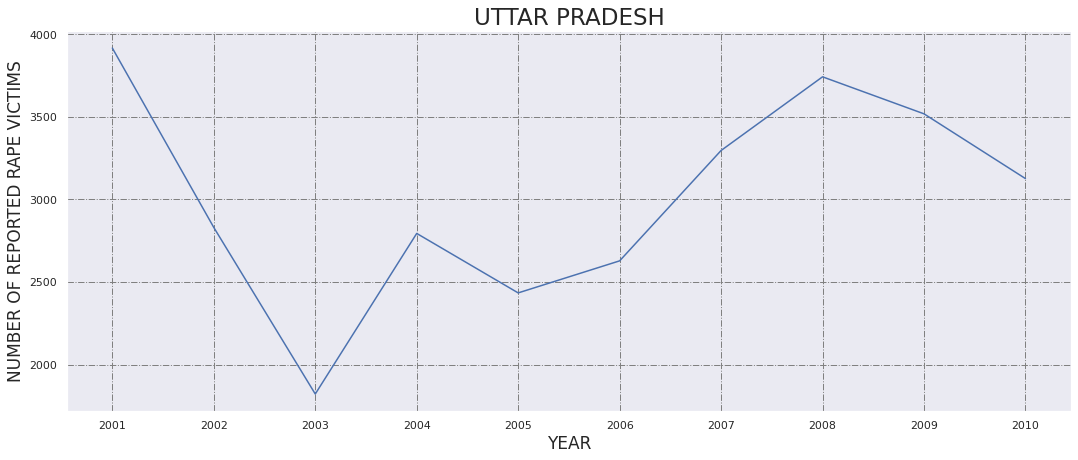

In [ ]:
mp_rape_victims = df[df['Location'] == 'Uttar Pradesh']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('UTTAR PRADESH',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

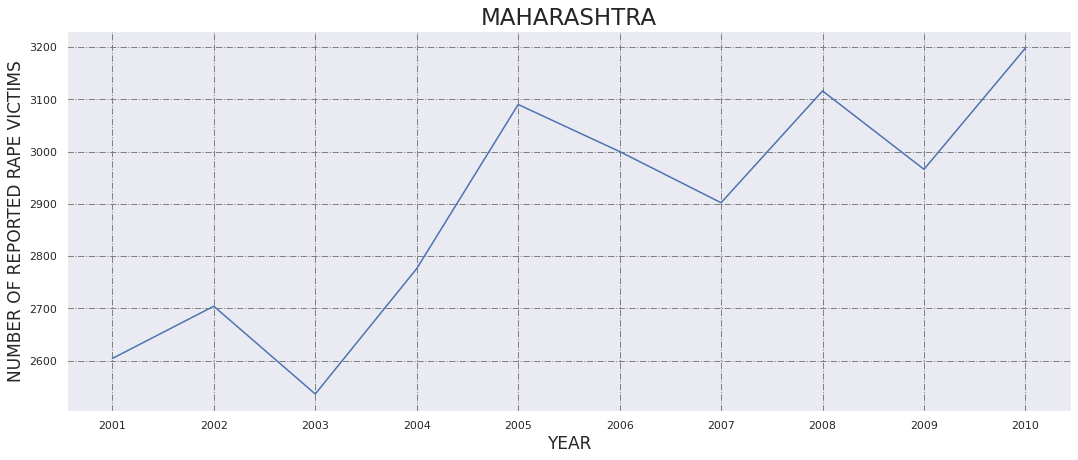

In [ ]:
mp_rape_victims = df[df['Location'] == 'Maharashtra']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('MAHARASHTRA',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

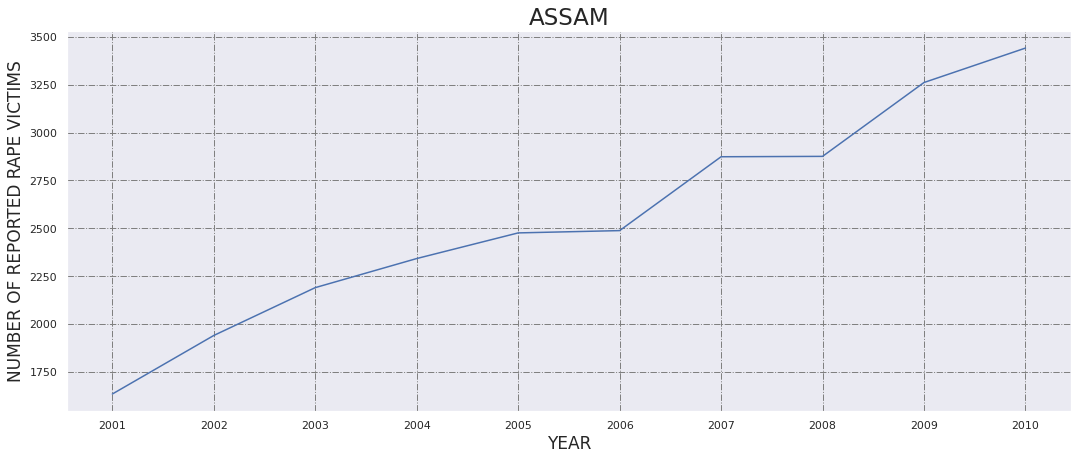

In [ ]:
mp_rape_victims = df[df['Location'] == 'Assam']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('ASSAM',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

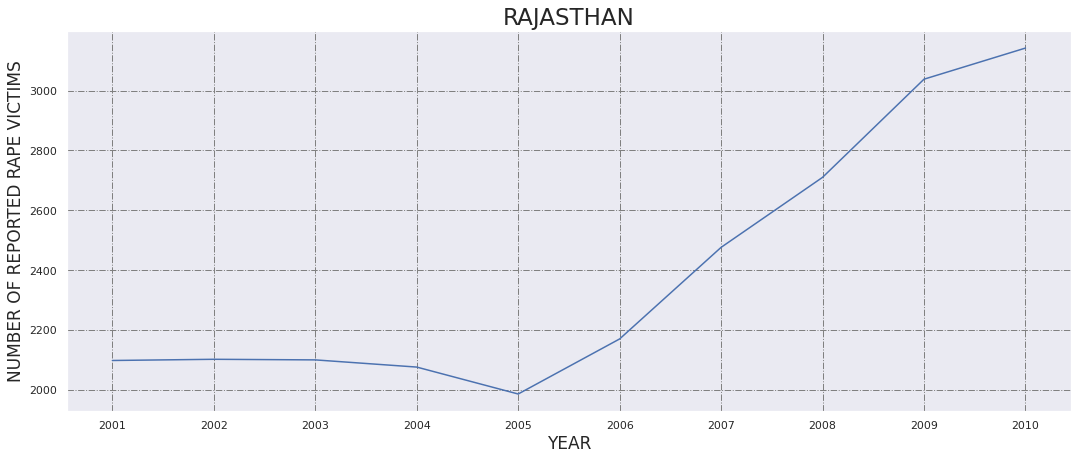

In [ ]:
mp_rape_victims = df[df['Location'] == 'Rajasthan']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('RAJASTHAN',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

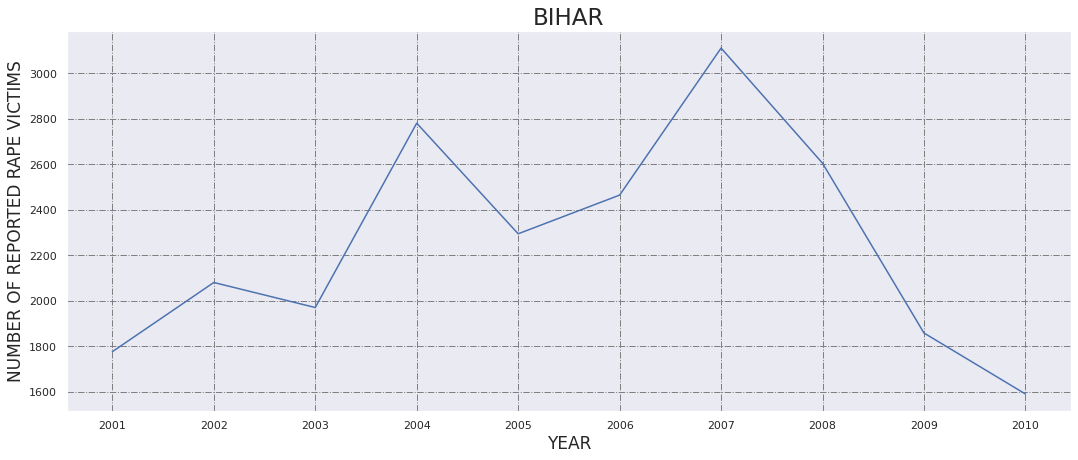

In [ ]:
mp_rape_victims = df[df['Location'] == 'Bihar']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('BIHAR',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

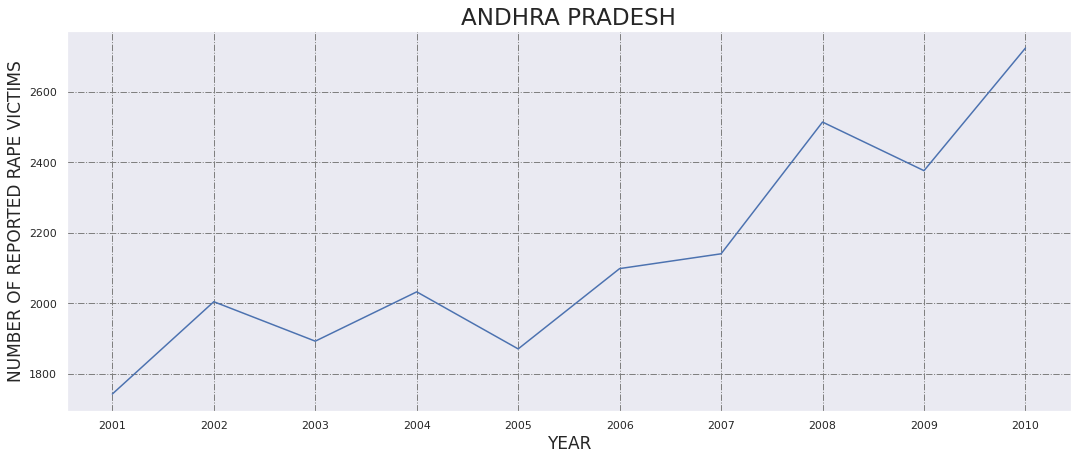

In [ ]:
mp_rape_victims = df[df['Location'] == 'Andhra Pradesh']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('ANDHRA PRADESH',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

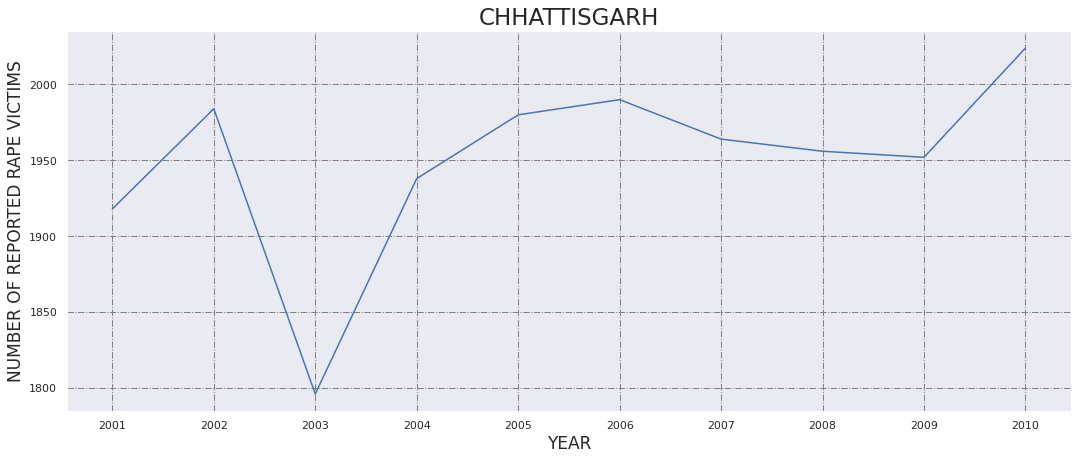

In [ ]:
mp_rape_victims = df[df['Location'] == 'Chhattisgarh']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('CHHATTISGARH',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

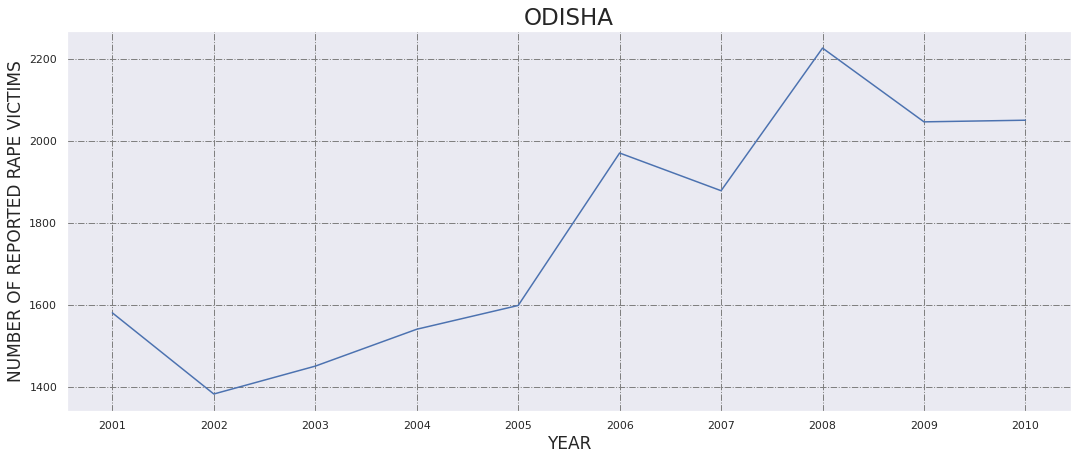

In [ ]:
mp_rape_victims = df[df['Location'] == 'Odisha']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('ODISHA',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

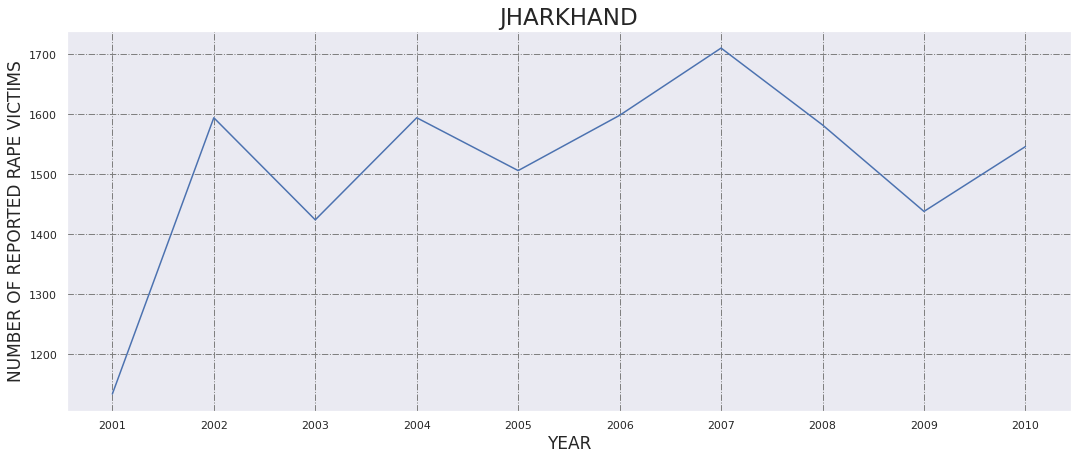

In [ ]:
mp_rape_victims = df[df['Location'] == 'Jharkhand']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('JHARKHAND',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

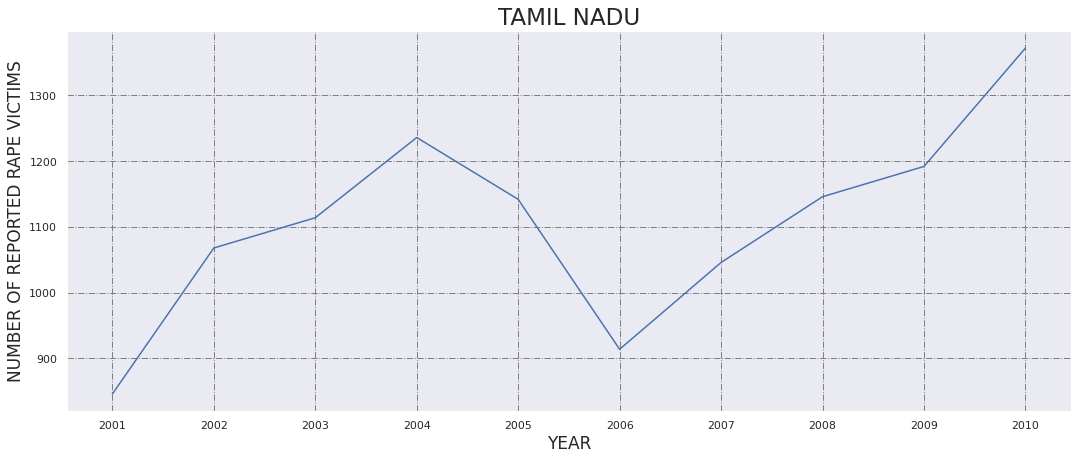

In [ ]:
mp_rape_victims = df[df['Location'] == 'Tamil Nadu']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('TAMIL NADU',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

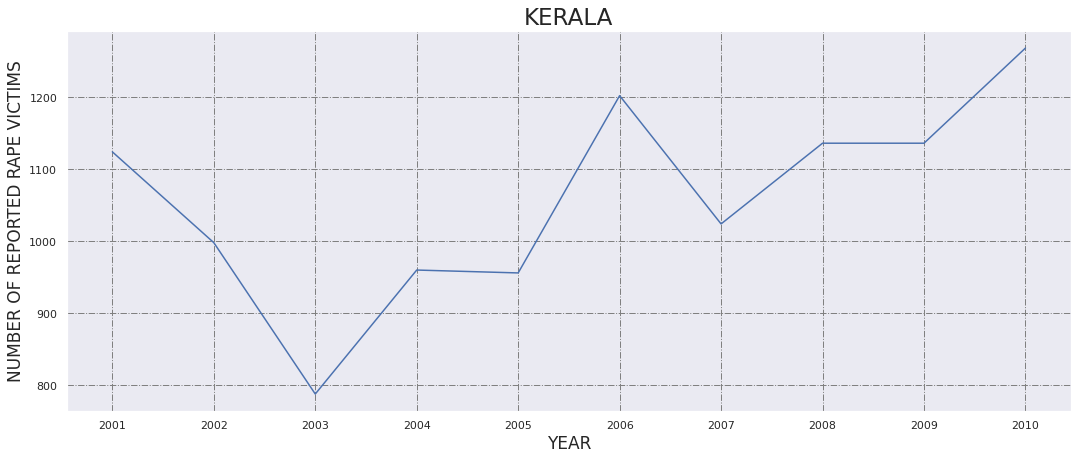

In [ ]:
mp_rape_victims = df[df['Location'] == 'Kerala']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('KERALA',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

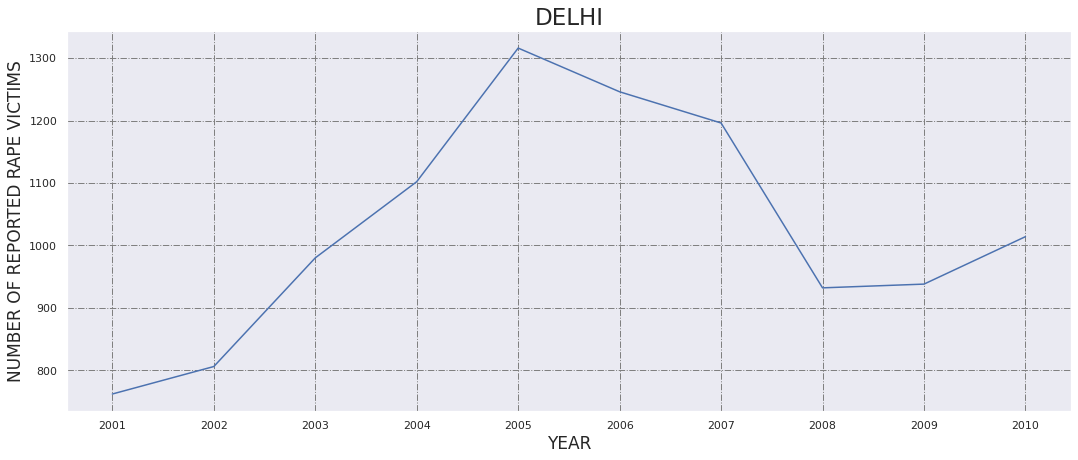

In [ ]:
mp_rape_victims = df[df['Location'] == 'Delhi']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('DELHI',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

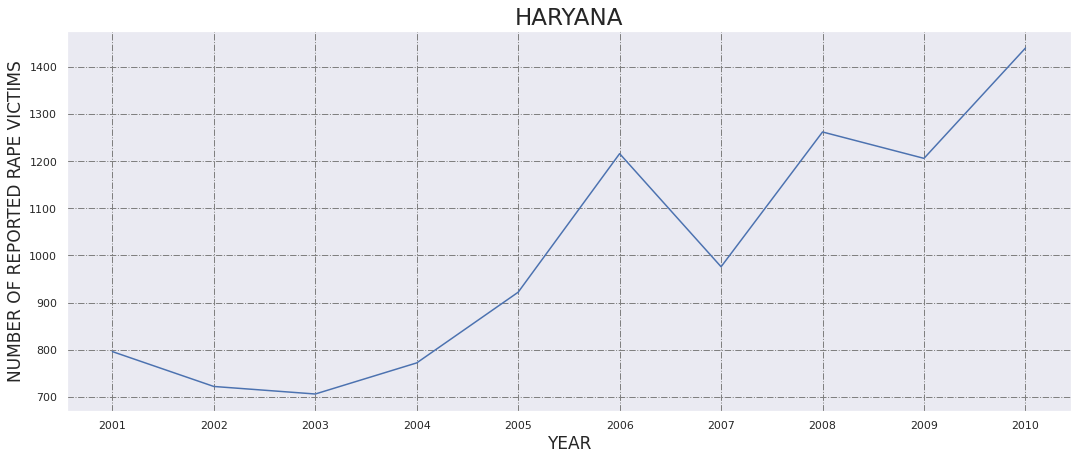

In [ ]:
mp_rape_victims = df[df['Location'] == 'Haryana']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('HARYANA',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

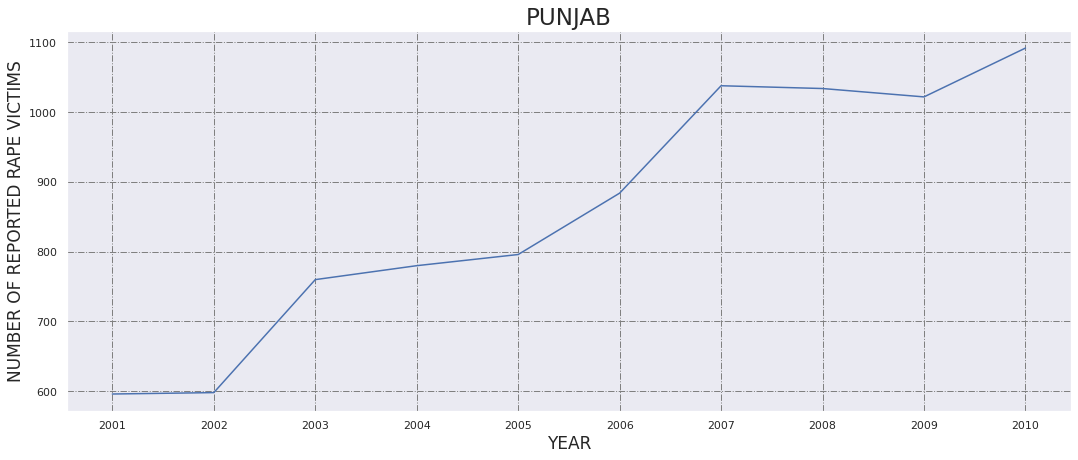

In [ ]:
mp_rape_victims = df[df['Location'] == 'Punjab']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('PUNJAB',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

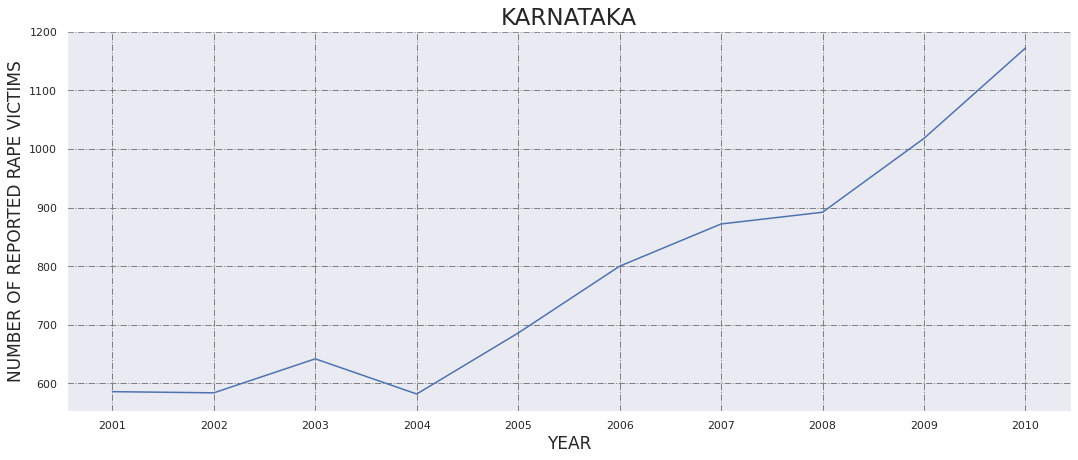

In [ ]:
mp_rape_victims = df[df['Location'] == 'Karnataka']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('KARNATAKA',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

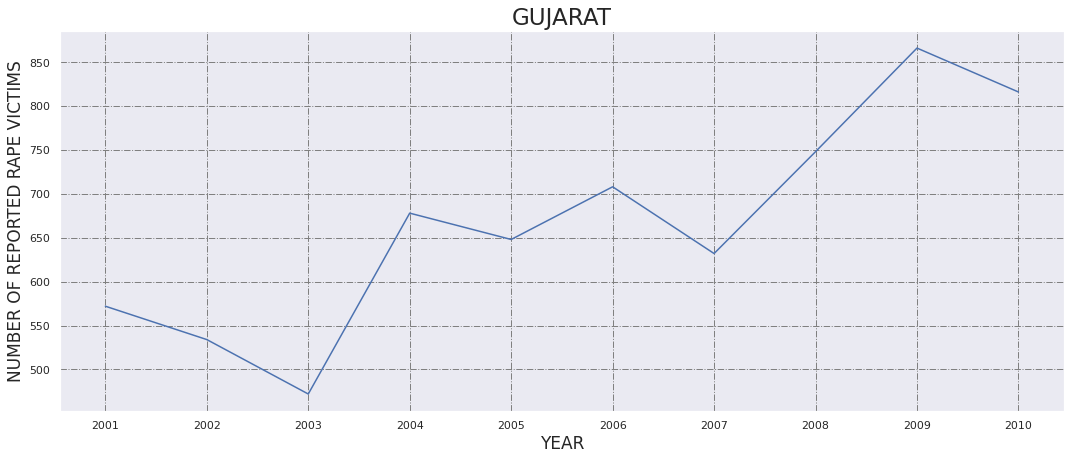

In [ ]:
mp_rape_victims = df[df['Location'] == 'Gujarat']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('GUJARAT',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

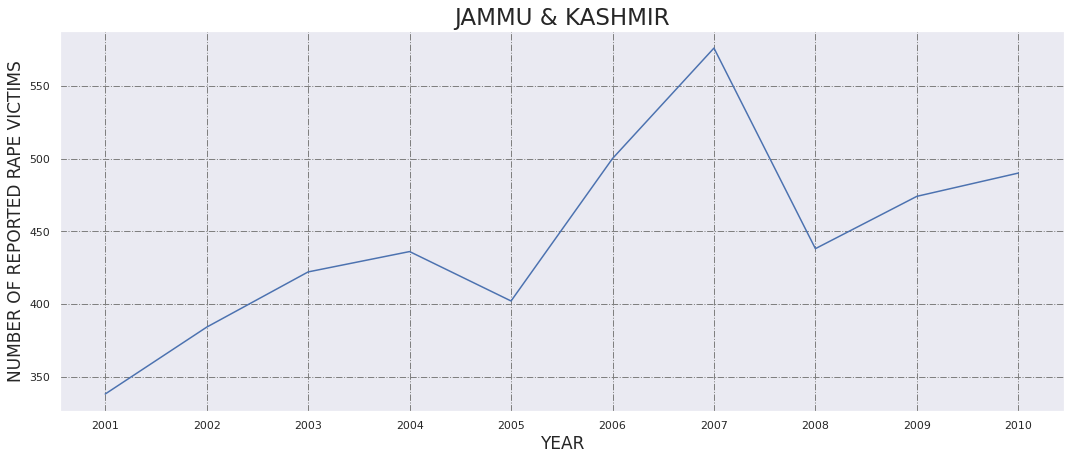

In [ ]:
mp_rape_victims = df[df['Location'] == 'Jammu & Kashmir']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('JAMMU & KASHMIR',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

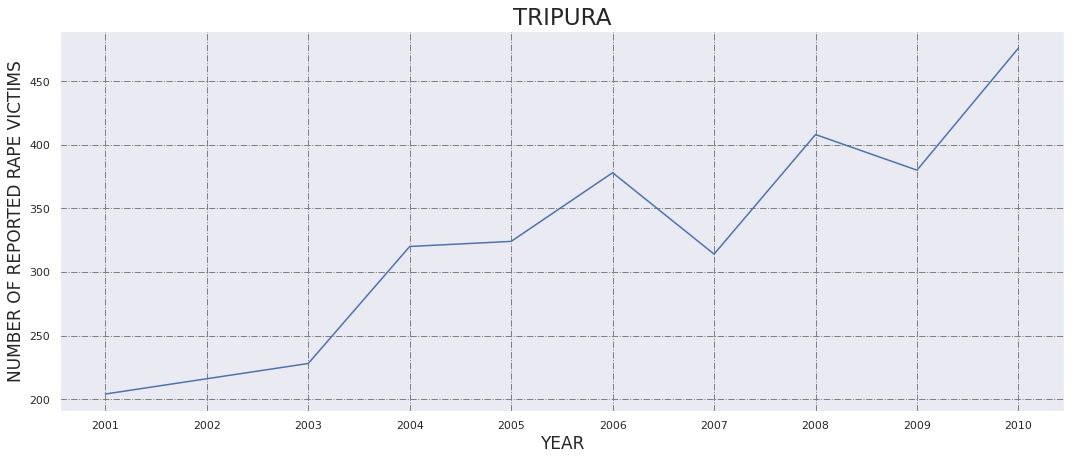

In [ ]:
mp_rape_victims = df[df['Location'] == 'Tripura']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('TRIPURA',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

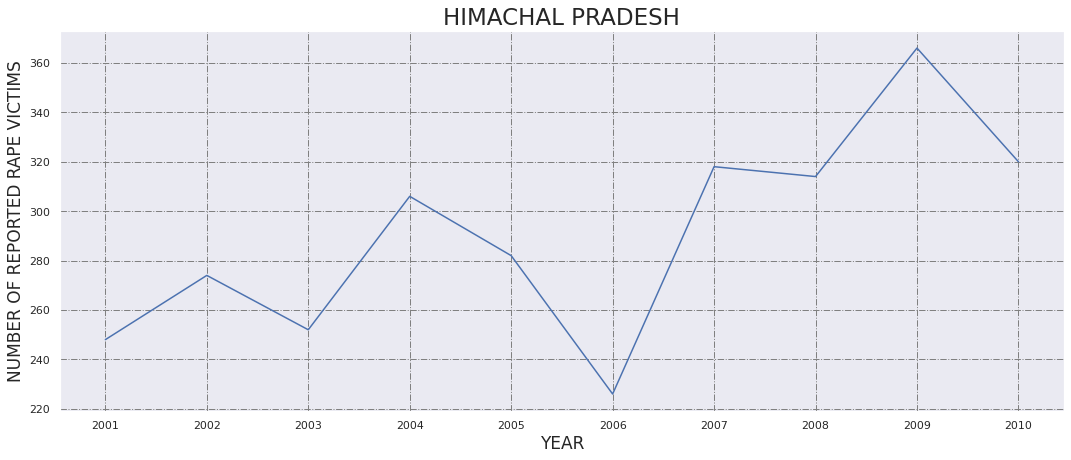

In [ ]:
mp_rape_victims = df[df['Location'] == 'Himachal Pradesh']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('HIMACHAL PRADESH',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

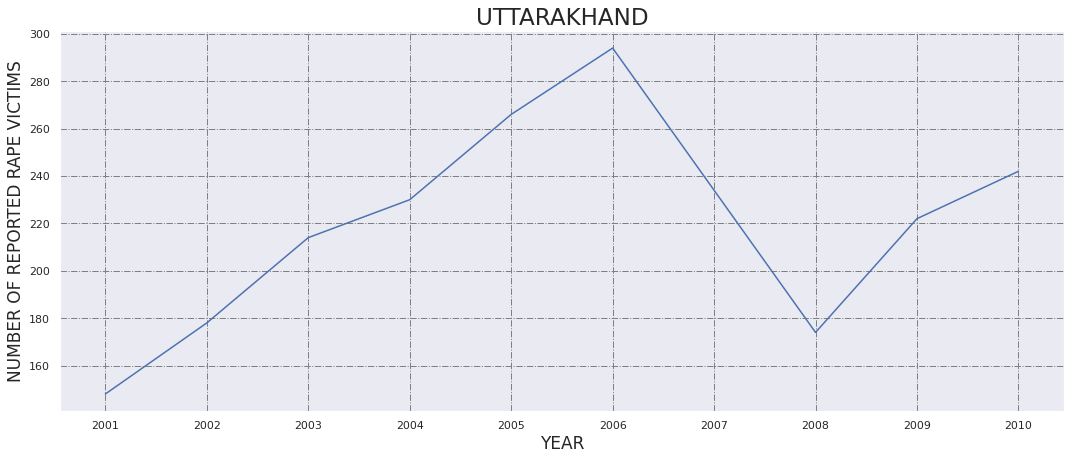

In [ ]:
mp_rape_victims = df[df['Location'] == 'Uttarakhand']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('UTTARAKHAND',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

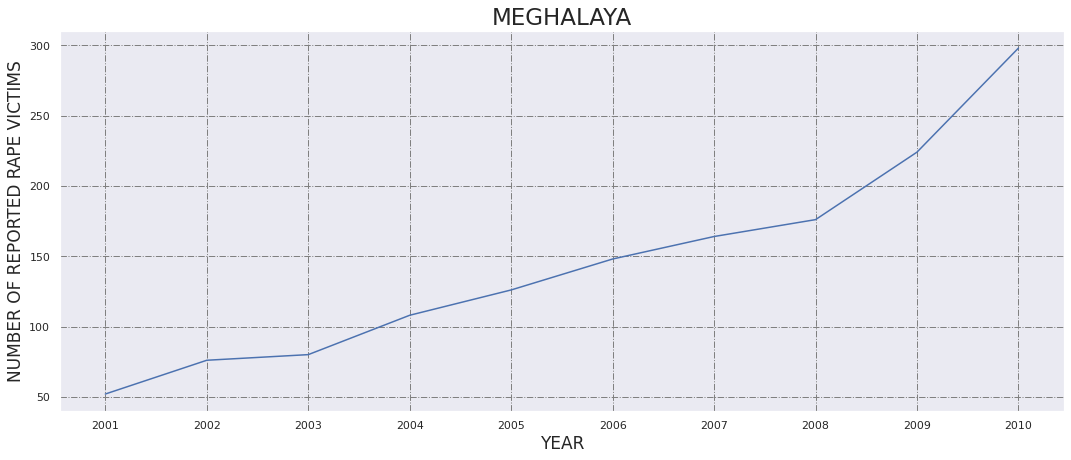

In [ ]:
mp_rape_victims = df[df['Location'] == 'Meghalaya']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('MEGHALAYA',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

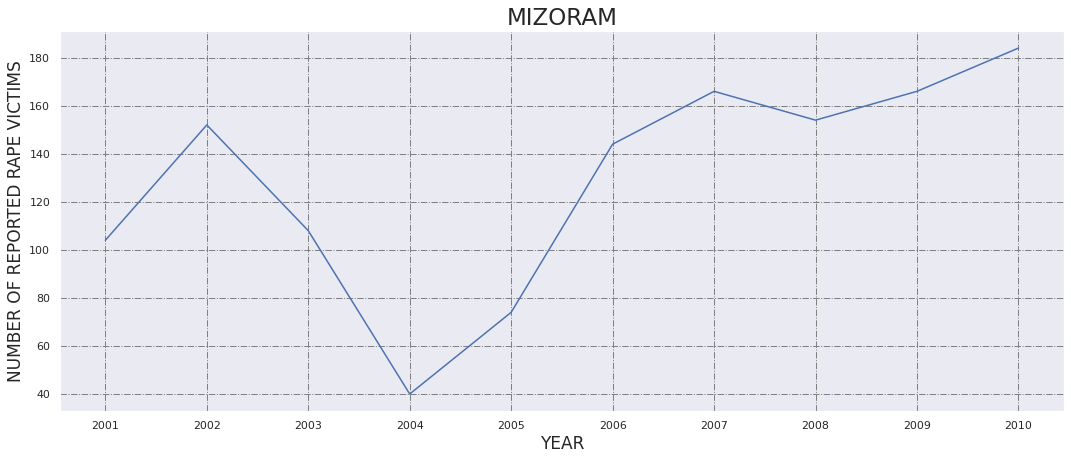

In [ ]:
mp_rape_victims = df[df['Location'] == 'Mizoram']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('MIZORAM',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

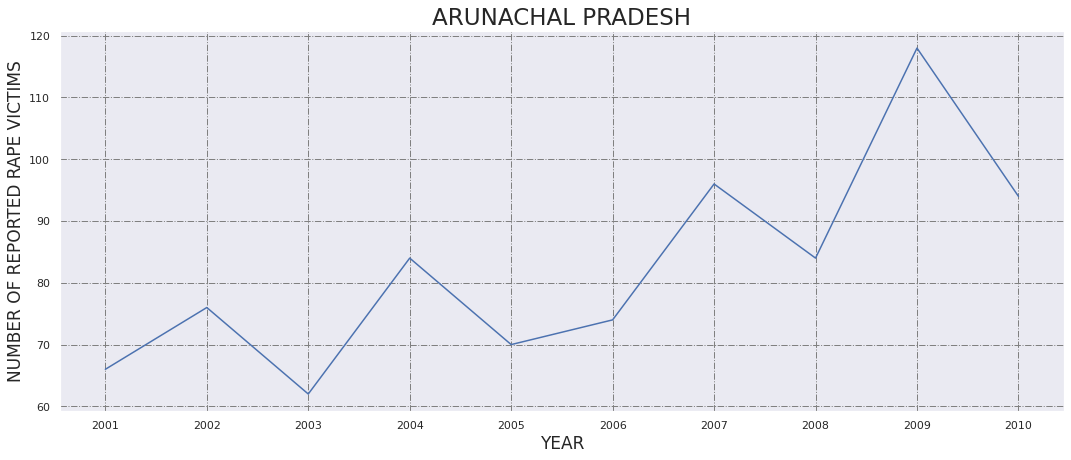

In [ ]:
mp_rape_victims = df[df['Location'] == 'Arunachal Pradesh']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('ARUNACHAL PRADESH',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

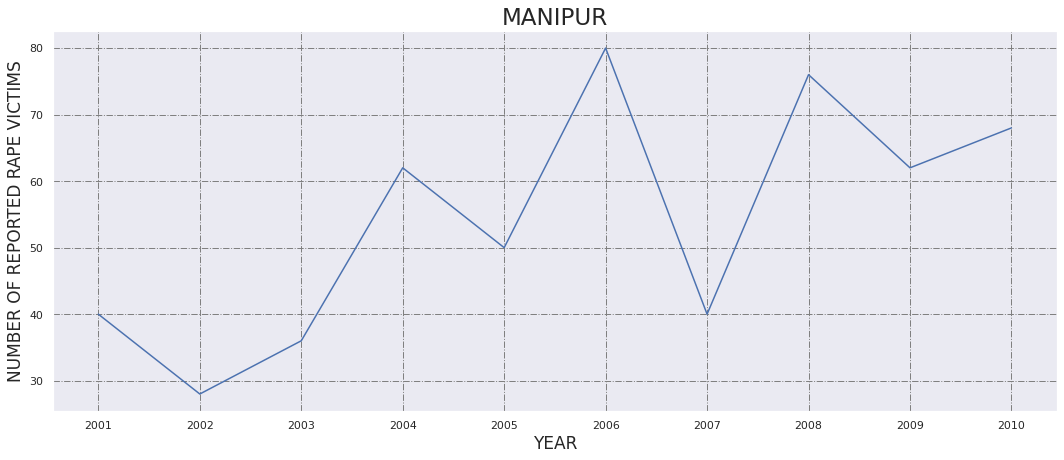

In [ ]:
mp_rape_victims = df[df['Location'] == 'Manipur']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('MANIPUR',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

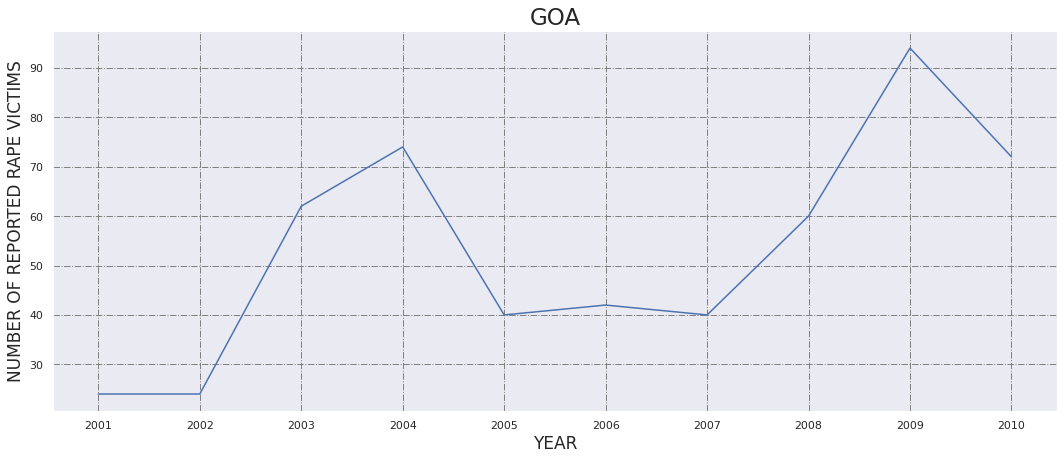

In [ ]:
mp_rape_victims = df[df['Location'] == 'Goa']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('GOA',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

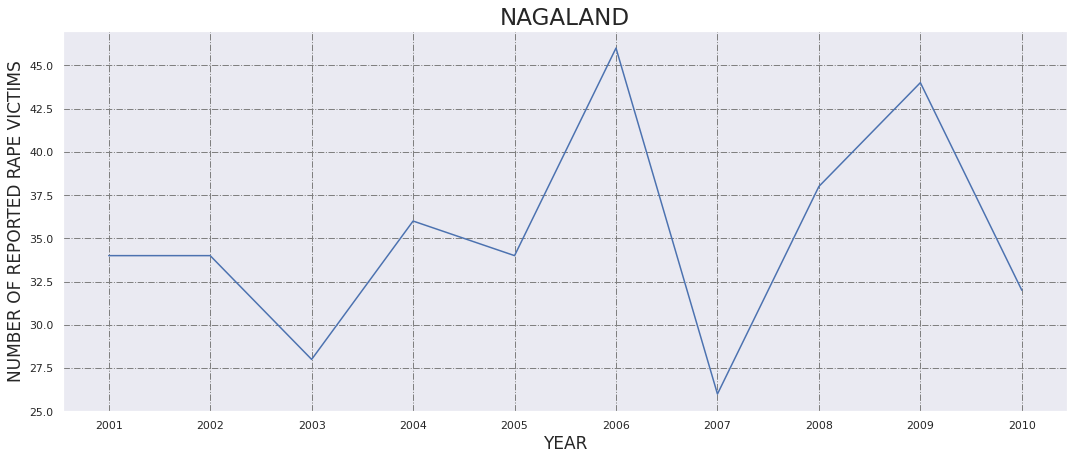

In [ ]:
mp_rape_victims = df[df['Location'] == 'Nagaland']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('NAGALAND',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

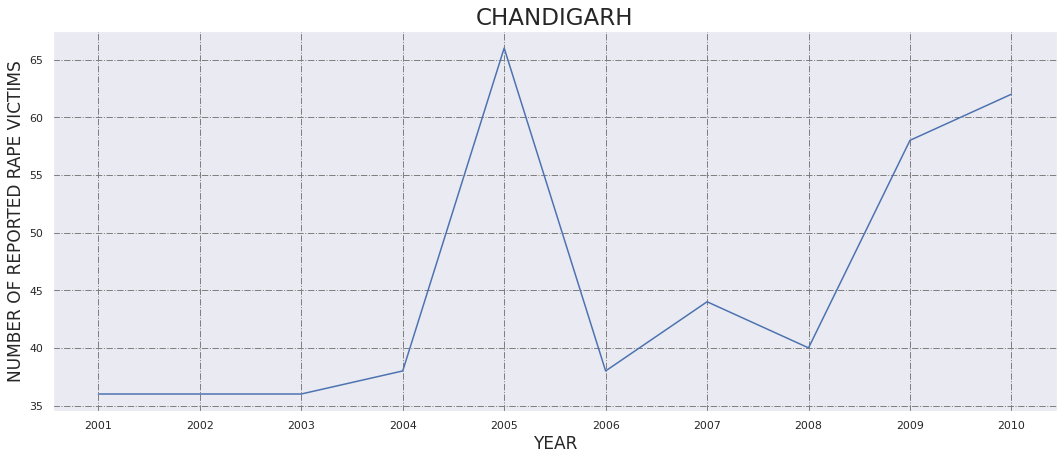

In [ ]:
mp_rape_victims = df[df['Location'] == 'Chandigarh']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('CHANDIGARH',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

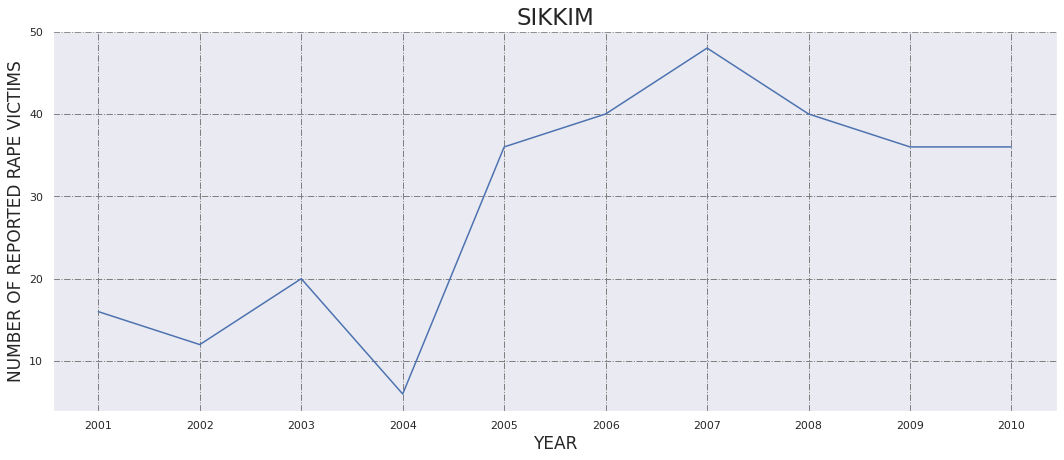

In [ ]:
mp_rape_victims = df[df['Location'] == 'Sikkim']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('SIKKIM',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

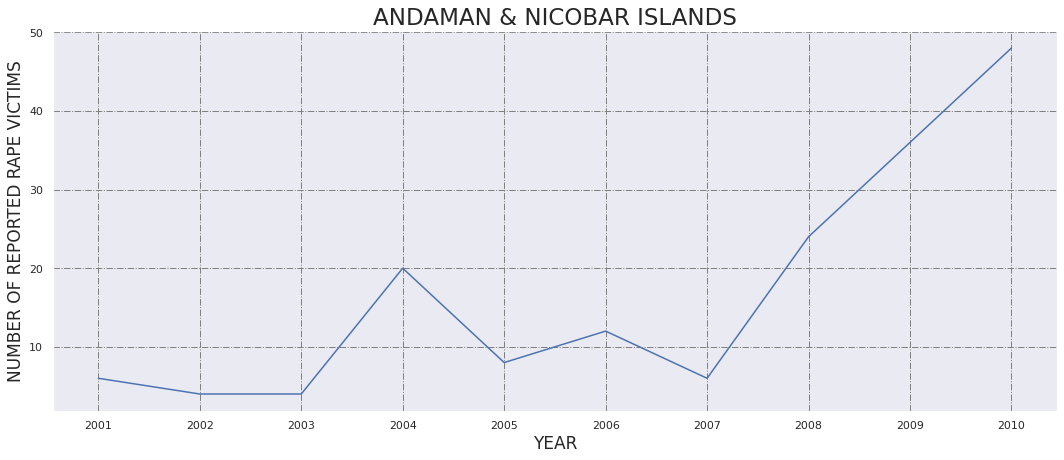

In [ ]:
mp_rape_victims = df[df['Location'] == 'Andaman & Nicobar Islands']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('ANDAMAN & NICOBAR ISLANDS',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

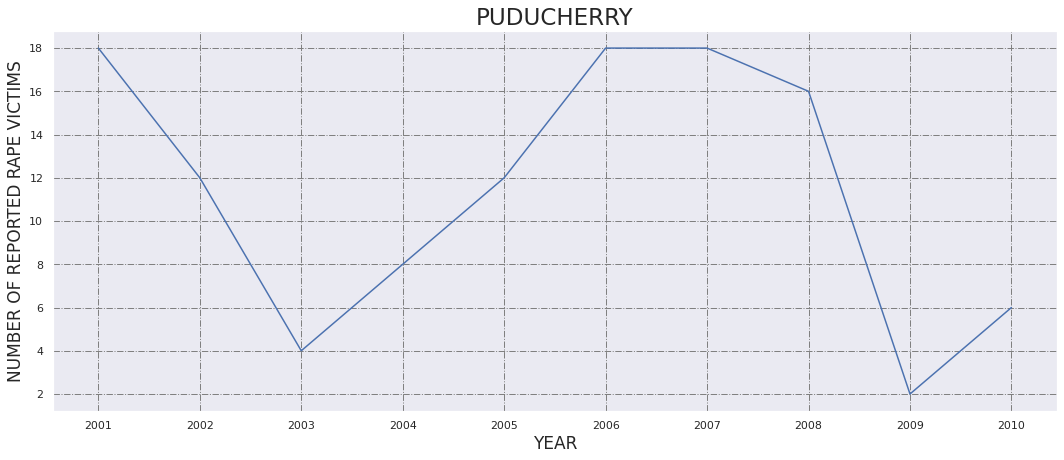

In [ ]:
mp_rape_victims = df[df['Location'] == 'Puducherry']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('PUDUCHERRY',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

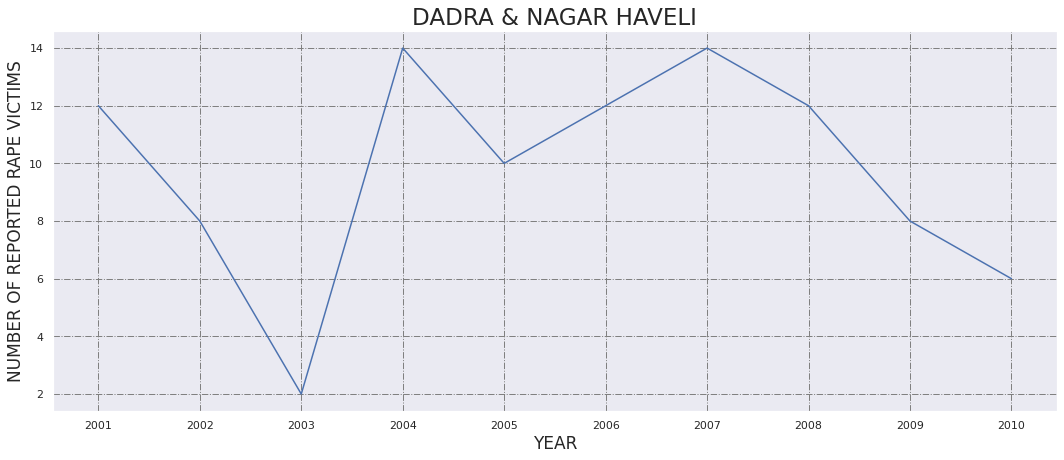

In [ ]:
mp_rape_victims = df[df['Location'] == 'Dadra & Nagar Haveli']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('DADRA & NAGAR HAVELI',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

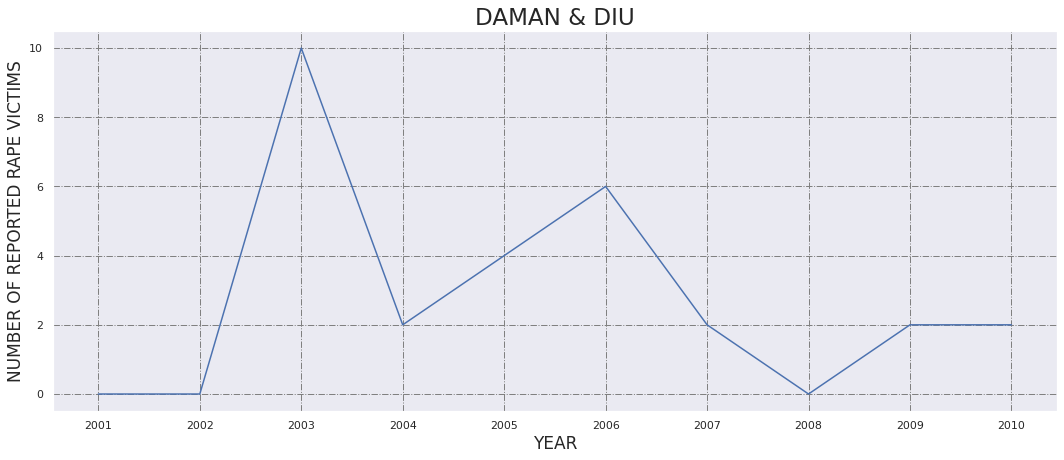

In [ ]:
mp_rape_victims = df[df['Location'] == 'Daman & Diu']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('DAMAN & DIU',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

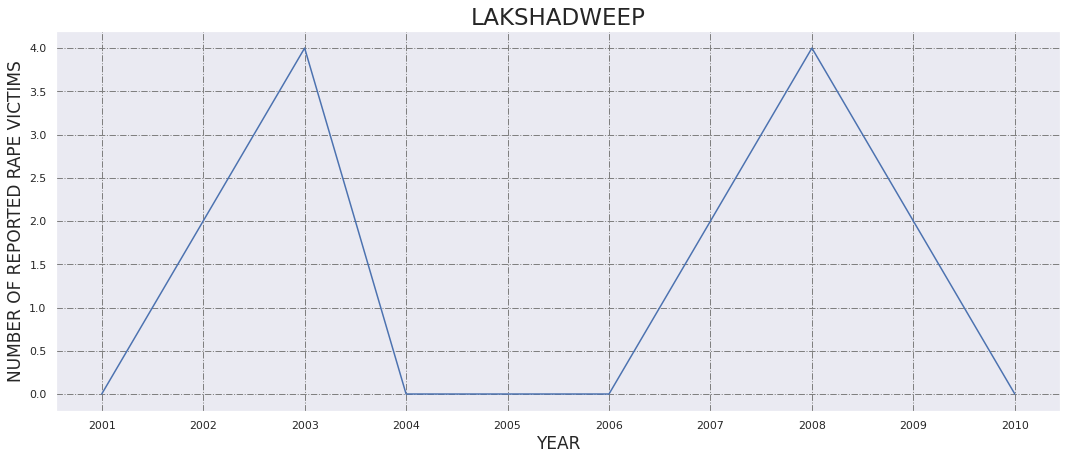

In [ ]:
mp_rape_victims = df[df['Location'] == 'Lakshadweep']
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

plt.subplots(figsize = (18, 7))
ax = mp_rape_victims_by_year['Cases Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set_xlabel('YEAR',fontsize=17)
ax.set_ylabel('NUMBER OF REPORTED RAPE VICTIMS',fontsize=17)
ax.set_title('LAKSHADWEEP',fontsize=23)
plt.grid(color='gray', linestyle='dashdot')
plt.show()

**Conclusions:**

1. From the above observations we can conclude that the maximum and minimum number of unreported cases are from **Maharshtra** and **Chattisgarh** respectively and the maximum and minimum number of reported cases are from **Madhya Pradesh** and **Lakshadweep Islands** respectively.

2. Victims lying in the age group of **18 to 30** years are higher in number as compared to the rest of the groups.


**Preventive Measures:**

- With advancement in technology, lots of devices have been fabricated to prevent heinous crimes such as rape. Gadgets like **Athena**, **WatchOverMe** and **Stilletto** uses modern GPS and alarm mechanisms to notify the members of the family about your current geographical location. It helps you access the emergency contacts of your device with just few clicks in a continuous pattern. 

- Learning martial arts is also a good option as it not only helps you to stay fit & healthy but also gives you immense mental and physical strength to counter attack in situations when you feel you are in danger.